<a href="https://colab.research.google.com/github/paulinofm/tensorflow2/blob/master/Colab_4_Construir_una_Red_Neuronal_Convolucional_con_TensorFlow_2_0_pfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paso 1: Instalar las dependencias y la configuración del notebook en GPU

In [ ]:
!pip install tensorflow-gpu==2.0.0.alpha0

## Paso 2: Importar las librerías necesarias

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.3.0'

## Paso 3: Pre procesado de datos


### Cargar el dataset  Cifar10

In [3]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [4]:
# Cargar el dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


### Normalización de las imágenes

In [5]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test = X_test / 255.0

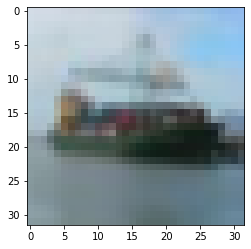

In [12]:
plt.imshow(X_test[1101])

In [13]:
y_test[10]

array([0], dtype=uint8)

## Paso 4: Construir una red neuronal convolucional

### Definir el modelo

In [240]:
model = tf.keras.models.Sequential(name='CNN_PFM')

### Añadir la primera capa de convolución

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- input_shape: (32, 32, 3)


In [241]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3],name='conv2D_1'))

### Añadir una segunda capa convolucional y la capa de max-pooling 

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [242]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu",name='conv2D_2'))

In [243]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid',name='MaxPool2d_1'))

### Añadir la tercera capa convolucional

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu


In [244]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu",name='conv2D_3'))

###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [245]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu",name='conv2D_4'))

In [246]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid',name='MaxPool2d_2'))

### Añadir la capa de flattening

In [247]:
model.add(tf.keras.layers.Flatten(name='Flattening_1'))


### Añadir la primera capa fully-connected

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 128
- activation: relu

In [248]:
model.add(tf.keras.layers.Dense(units=4096, activation='relu',name='fully_connected_1'))

Añado una segunda capa de 512 neuronas
- units/neurons: 512
- activation: relu

In [249]:
model.add(tf.keras.layers.Dense(units=512, activation='relu',name='fully_connected_2'))

Añado un dropout de 0.35

In [250]:
model.add(tf.keras.layers.Dropout(rate=0.35 ,name='Dropout_1'))

Añadir tercera capa

In [251]:
model.add(tf.keras.layers.Dense(units=128, activation='relu',name='fully_connected_3'))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [252]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax',name='EXIT_LAYER'))

In [253]:
model.summary()

Model: "CNN_PFM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2D_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2D_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
MaxPool2d_1 (MaxPooling2D)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2D_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2D_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
MaxPool2d_2 (MaxPooling2D)   (None, 8, 8, 64)          0         
_________________________________________________________________
Flattening_1 (Flatten)       (None, 4096)              0   

### Compilar el modelo

#### sparse_categorical_accuracy
sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [254]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=["sparse_categorical_accuracy"])

### Entrenar el modelo

In [255]:
model.fit(X_train, y_train, epochs=15,batch_size=64)

Epoch 1/15
782/782 [==============================] - 5s 7ms/step - loss: 1.4816 - sparse_categorical_accuracy: 0.4560
Epoch 2/15
782/782 [==============================] - 5s 7ms/step - loss: 0.9709 - sparse_categorical_accuracy: 0.6615
Epoch 3/15
782/782 [==============================] - 5s 7ms/step - loss: 0.7210 - sparse_categorical_accuracy: 0.7497
Epoch 4/15
782/782 [==============================] - 5s 7ms/step - loss: 0.5154 - sparse_categorical_accuracy: 0.8213
Epoch 5/15
782/782 [==============================] - 5s 7ms/step - loss: 0.3355 - sparse_categorical_accuracy: 0.8844
Epoch 6/15
782/782 [==============================] - 5s 7ms/step - loss: 0.1992 - sparse_categorical_accuracy: 0.9324
Epoch 7/15
782/782 [==============================] - 5s 7ms/step - loss: 0.1372 - sparse_categorical_accuracy: 0.9552
Epoch 8/15
782/782 [==============================] - 5s 7ms/step - loss: 0.1097 - sparse_categorical_accuracy: 0.9637
Epoch 9/15
782/782 [============================

### Evaluar el modelo

In [256]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5065 - sparse_categorical_accuracy: 0.7238


In [257]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.723800003528595
